Train data:  (50000, 32, 32, 3)
Train filenames:  (50000,)
Train labels:  (50000,)
Test data:  (10000, 32, 32, 3)
Test filenames:  (10000,)
Test labels:  (10000,)
Label names:  (10,)


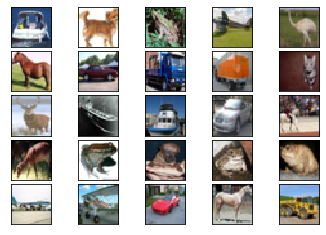

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

"""
The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 
training images and 10000 test images.
The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains 
exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random 
order, but some training batches may contain more images from one class than another. Between them, the training 
batches contain exactly 5000 images from each class.
"""


def unpickle(file):
    """load the cifar-10 data"""

    with open(file, 'rb') as fo:
        data = pickle.load(fo, encoding='bytes')
    return data


def load_cifar_10_data(data_dir, negatives=False):
    """
    Return train_data, train_filenames, train_labels, test_data, test_filenames, test_labels
    """

    # get the meta_data_dict
    # num_cases_per_batch: 1000
    # label_names: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    # num_vis: :3072

    meta_data_dict = unpickle(data_dir + "/batches.meta")
    cifar_label_names = meta_data_dict[b'label_names']
    cifar_label_names = np.array(cifar_label_names)

    # training data
    cifar_train_data = None
    cifar_train_filenames = []
    cifar_train_labels = []

    # cifar_train_data_dict
    # 'batch_label': 'training batch 5 of 5'
    # 'data': ndarray
    # 'filenames': list
    # 'labels': list

    for i in range(1, 6):
        cifar_train_data_dict = unpickle(data_dir + "/data_batch_{}".format(i))
        if i == 1:
            cifar_train_data = cifar_train_data_dict[b'data']
        else:
            cifar_train_data = np.vstack((cifar_train_data, cifar_train_data_dict[b'data']))
        cifar_train_filenames += cifar_train_data_dict[b'filenames']
        cifar_train_labels += cifar_train_data_dict[b'labels']

    cifar_train_data = cifar_train_data.reshape((len(cifar_train_data), 3, 32, 32))
    if negatives:
        cifar_train_data = cifar_train_data.transpose(0, 2, 3, 1).astype(np.float32)
    else:
        cifar_train_data = np.rollaxis(cifar_train_data, 1, 4)
    cifar_train_filenames = np.array(cifar_train_filenames)
    cifar_train_labels = np.array(cifar_train_labels)

    # test data
    # cifar_test_data_dict
    # 'batch_label': 'testing batch 1 of 1'
    # 'data': ndarray
    # 'filenames': list
    # 'labels': list

    cifar_test_data_dict = unpickle(data_dir + "/test_batch")
    cifar_test_data = cifar_test_data_dict[b'data']
    cifar_test_filenames = cifar_test_data_dict[b'filenames']
    cifar_test_labels = cifar_test_data_dict[b'labels']

    cifar_test_data = cifar_test_data.reshape((len(cifar_test_data), 3, 32, 32))
    if negatives:
        cifar_test_data = cifar_test_data.transpose(0, 2, 3, 1).astype(np.float32)
    else:
        cifar_test_data = np.rollaxis(cifar_test_data, 1, 4)
    cifar_test_filenames = np.array(cifar_test_filenames)
    cifar_test_labels = np.array(cifar_test_labels)

    return cifar_train_data, cifar_train_filenames, cifar_train_labels, \
        cifar_test_data, cifar_test_filenames, cifar_test_labels, cifar_label_names


if __name__ == "__main__":
    """show it works"""

    cifar_10_dir = 'cifar-10-batches-py'

    train_data, train_filenames, train_labels, test_data, test_filenames, test_labels, label_names = \
        load_cifar_10_data(cifar_10_dir)

    print("Train data: ", train_data.shape)
    print("Train filenames: ", train_filenames.shape)
    print("Train labels: ", train_labels.shape)
    print("Test data: ", test_data.shape)
    print("Test filenames: ", test_filenames.shape)
    print("Test labels: ", test_labels.shape)
    print("Label names: ", label_names.shape)

    # Don't forget that the label_names and filesnames are in binary and need conversion if used.

    # display some random training images in a 25x25 grid
    num_plot = 5
    f, ax = plt.subplots(num_plot, num_plot)
    for m in range(num_plot):
        for n in range(num_plot):
            idx = np.random.randint(0, train_data.shape[0])
            ax[m, n].imshow(train_data[idx])
            ax[m, n].get_xaxis().set_visible(False)
            ax[m, n].get_yaxis().set_visible(False)
    f.subplots_adjust(hspace=0.1)
    f.subplots_adjust(wspace=0)
    plt.show()

In [2]:
label_name = []
for i in range(len(label_names)):
    lbl = str(label_names[i],'utf-8')
    label_name.append(lbl)
    
print(label_name)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [3]:
Data = np.concatenate((train_data,test_data))
labels = np.concatenate((train_labels,test_labels))
print(Data.shape)
print(labels.shape)

(60000, 32, 32, 3)
(60000,)


In [4]:
from sklearn.utils import shuffle
Data, labels = shuffle(Data, labels)

In [5]:
data_cnn = Data[:30000]
labels_cnn = labels[:30000]
print(data_cnn.shape)
print(labels_cnn.shape)
data_kmeans = Data[30000:]
labels_kmeans = labels[30000:]
print(data_kmeans.shape)
print(labels_kmeans.shape)

(30000, 32, 32, 3)
(30000,)
(30000, 32, 32, 3)
(30000,)


In [6]:
ntrain_batches = 100 #number of batches for training (hyperparameter)

data_cnn_batches = np.split(data_cnn,ntrain_batches,axis=0)
labels_cnn_batches = np.split(labels_cnn,ntrain_batches,axis=0)

data_cnnb = np.array(data_cnn_batches)
labels_cnnb = np.array(labels_cnn_batches)

In [7]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

# Inputs
X = tf.placeholder("float",shape=[None,32,32,3], name='input_x')
Y = tf.placeholder(tf.int32,shape = [None], name='output_y')
prob = tf.placeholder_with_default(1.0,shape=(), name='keep_prob')

Instructions for updating:
non-resource variables are not supported in the long term


In [8]:
#Convolution layer1
W1 = tf.Variable(tf.truncated_normal(shape=[3,3,3,64], mean=0.0, stddev=0.03), name = 'weight1')
b1 = tf.Variable((0.01*tf.ones([64])),name = 'bias1')
conv1 = tf.nn.conv2d(X, W1, [1, 1, 1, 1], padding='SAME')
conv1_bd = tf.nn.bias_add(conv1, b1)
conv1_bn = tf.nn.lrn(conv1_bd, 4, bias=1.0, alpha=0.001 / 9.0, beta=0.75,name='norm1')
conv1_rl = tf.nn.relu(conv1_bn)
conv1_pool = tf.nn.max_pool(conv1_rl, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

#Convolution layer2
W2 = tf.Variable(tf.truncated_normal(shape=[3,3,64,128], mean=0.0, stddev=0.03), name = 'weight2')
b2 = tf.Variable((0.01*tf.ones([128])),name = 'bias2')
conv2 = tf.nn.conv2d(conv1_pool, W2, [1, 1, 1, 1], padding='SAME')
conv2_bd = tf.nn.bias_add(conv2, b2)
conv2_bn = tf.nn.lrn(conv2_bd, 4, bias=1.0, alpha=0.001 / 9.0, beta=0.75,name='norm2')
conv2_rl = tf.nn.relu(conv2_bn)
conv2_pool = tf.nn.max_pool(conv2_rl, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

#Convolution layer3
W3 = tf.Variable(tf.truncated_normal(shape=[3,3,128,256], mean=0.0, stddev=0.03), name = 'weight3')
b3 = tf.Variable((0.01*tf.ones([256])),name = 'bias3')
conv3 = tf.nn.conv2d(conv2_pool, W3, [1, 1, 1, 1], padding='SAME')
conv3_bd = tf.nn.bias_add(conv3, b3)
conv3_bn = tf.nn.lrn(conv3_bd, 4, bias=1.0, alpha=0.001 / 9.0, beta=0.75,name='norm3')
conv3_rl = tf.nn.relu(conv3_bn)
conv3_pool = tf.nn.max_pool(conv3_rl, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

#Fully connected layer1
gts = conv3_pool.get_shape()
dim = gts[1]*gts[2]*gts[3]
dime = dim.value
reshp = tf.reshape(conv3_pool, [-1,dime],name = 'features')
W4 = tf.Variable(tf.truncated_normal(shape=[dime,512], mean=0.0, stddev=0.03), name = 'weight4')
b4 = tf.Variable((0.01*tf.ones([512])),name = 'bias4')
fc1 = tf.nn.relu(tf.matmul(reshp, W4) + b4)
fc1dr = tf.nn.dropout(fc1,prob)

#Fully connected layer2
W5 = tf.Variable(tf.truncated_normal(shape=[512,256], mean=0.0, stddev=0.03), name = 'weight5')
b5 = tf.Variable((0.01*tf.ones([256])),name = 'bias5')
fc2 = tf.nn.relu(tf.matmul(fc1dr, W5)+b5)
fc2dr = tf.nn.dropout(fc2,prob)

#Fully connected layer3
W6 = tf.Variable(tf.random.uniform(shape=[256,10], minval=-1, maxval=1), name = 'weight6')
b6 = tf.Variable(tf.zeros([10]),name = 'bias6')
fc3 = tf.add(tf.matmul(fc2dr, W6),b6)

#Softmax activation
ypr = tf.nn.softmax(fc3)
model = tf.identity(ypr, name='ypr')

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [9]:
#Hyperparameters
wd = 0.01  
learning_rate = 0.001
keep_prob = 0.5
epoch = 20
epsilon = 1e-3

In [10]:
wdls = 0.5*wd*(tf.nn.l2_loss(W1)+tf.nn.l2_loss(W2)+tf.nn.l2_loss(W3)+tf.nn.l2_loss(W4)
               +tf.nn.l2_loss(W5)+tf.nn.l2_loss(W6))
    
loss = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=Y, logits=fc3, name='cross_entropy_per_example')
loss_mean = tf.reduce_mean(loss) + wdls
model2 = tf.identity(loss_mean, name='mean_loss')

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate,epsilon=epsilon).minimize(loss_mean)

#Accuracy
correct_pred = tf.equal(tf.argmax(input=ypr, axis=1, output_type=tf.int32), Y)
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

In [11]:
saver = tf.train.Saver();
init = tf.global_variables_initializer()

with tf.Session() as session:
    session.run(init)
    loss = []
    train_acc = []
    epoch_pos = []
    for step in range(epoch):
        for i in range(ntrain_batches):
            session.run(optimizer,feed_dict={X: data_cnnb[i], Y: labels_cnnb[i], prob: 0.5})
            if i % 25 == 0:
                ls = session.run(loss_mean,feed_dict={X: data_cnnb[i], Y: labels_cnnb[i]})
                tracc = 100*(session.run(accuracy,feed_dict={X: data_cnnb[i], Y: labels_cnnb[i]}))
                epps = step + ((i+1)/ntrain_batches)
                loss.append(ls)
                train_acc.append(tracc)
                epoch_pos.append(epps)
                print('{} batches done'.format(i))
        print('Epoch {}'.format(step))
    save_path = saver.save(session,r"C:\Users\rahul\Google Drive\Rahul\Courses\ECE219\Project_2\Model\model.ckpt")

0 batches done
25 batches done
50 batches done
75 batches done
Epoch 0
0 batches done
25 batches done
50 batches done
75 batches done
Epoch 1
0 batches done
25 batches done
50 batches done
75 batches done
Epoch 2
0 batches done
25 batches done
50 batches done
75 batches done
Epoch 3
0 batches done
25 batches done
50 batches done
75 batches done
Epoch 4
0 batches done
25 batches done
50 batches done
75 batches done
Epoch 5
0 batches done
25 batches done
50 batches done
75 batches done
Epoch 6
0 batches done
25 batches done
50 batches done
75 batches done
Epoch 7
0 batches done
25 batches done
50 batches done
75 batches done
Epoch 8
0 batches done
25 batches done
50 batches done
75 batches done
Epoch 9
0 batches done
25 batches done
50 batches done
75 batches done
Epoch 10
0 batches done
25 batches done
50 batches done
75 batches done
Epoch 11
0 batches done
25 batches done
50 batches done
75 batches done
Epoch 12
0 batches done
25 batches done
50 batches done
75 batches done
Epoch 13
0 

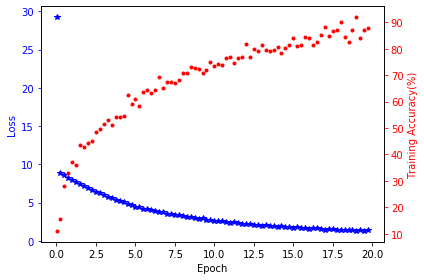

In [12]:
fig, ax1 = plt.subplots()
ax1.plot(epoch_pos, loss, 'b*')
ax1.set_xlabel('Epoch')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Loss', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(epoch_pos,train_acc, 'r.')
ax2.set_ylabel('Training Accuracy(%)', color='r')
ax2.tick_params('y', colors='r')

fig.tight_layout()
plt.show()

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer

def display_image_predictions(features, labels, predictions, n_samples=1,top_n_predictions=1):
    n_classes = 10
    label_names = label_name
    #label_binarizer = LabelBinarizer()
    #label_binarizer.fit(range(n_classes))
    #label_ids = label_binarizer.transform(labels)
    label_ids = labels

    fig, axies = plt.subplots(nrows=n_samples, ncols=2, figsize=(20, 10))
    fig.tight_layout()
    fig.suptitle('Softmax Predictions', fontsize=20, y=1.1)

    n_predictions = top_n_predictions
    margin = 0.05
    ind = np.arange(n_predictions)
    width = (1. - 2. * margin) / n_predictions
   
    
    for i in range(n_samples):                                    
        pred_names = [label_names[pred_i] for pred_i in predictions.indices[i]]
        correct_name = label_names[label_ids[i]]
        if n_samples==1:
            axies[0].imshow(features[i].astype(np.int32, copy=False))
            axies[0].set_title(correct_name)
            axies[0].set_axis_off()

            axies[1].barh(ind + margin, predictions.values[i][:n_predictions], width)
            axies[1].set_yticks(ind + margin)
            axies[1].set_yticklabels(pred_names[:n_predictions])
            axies[1].set_xticks([0, 0.5, 1.0])
        else:
            axies[i,0].imshow(features[i].astype(np.int32, copy=False))
            axies[i,0].set_title(correct_name)
            axies[i,0].set_axis_off()

            axies[i,1].barh(ind + margin, predictions.values[i][:n_predictions], width)
            axies[i,1].set_yticks(ind + margin)
            axies[i,1].set_yticklabels(pred_names[:n_predictions])
            axies[i,1].set_xticks([0, 0.5, 1.0])

Instructions for updating:
non-resource variables are not supported in the long term
INFO:tensorflow:Restoring parameters from C:\Users\rahul\Google Drive\Rahul\Courses\ECE219\Project_2\Model\model.ckpt
Test Accuracy : 78.28666766484578 %


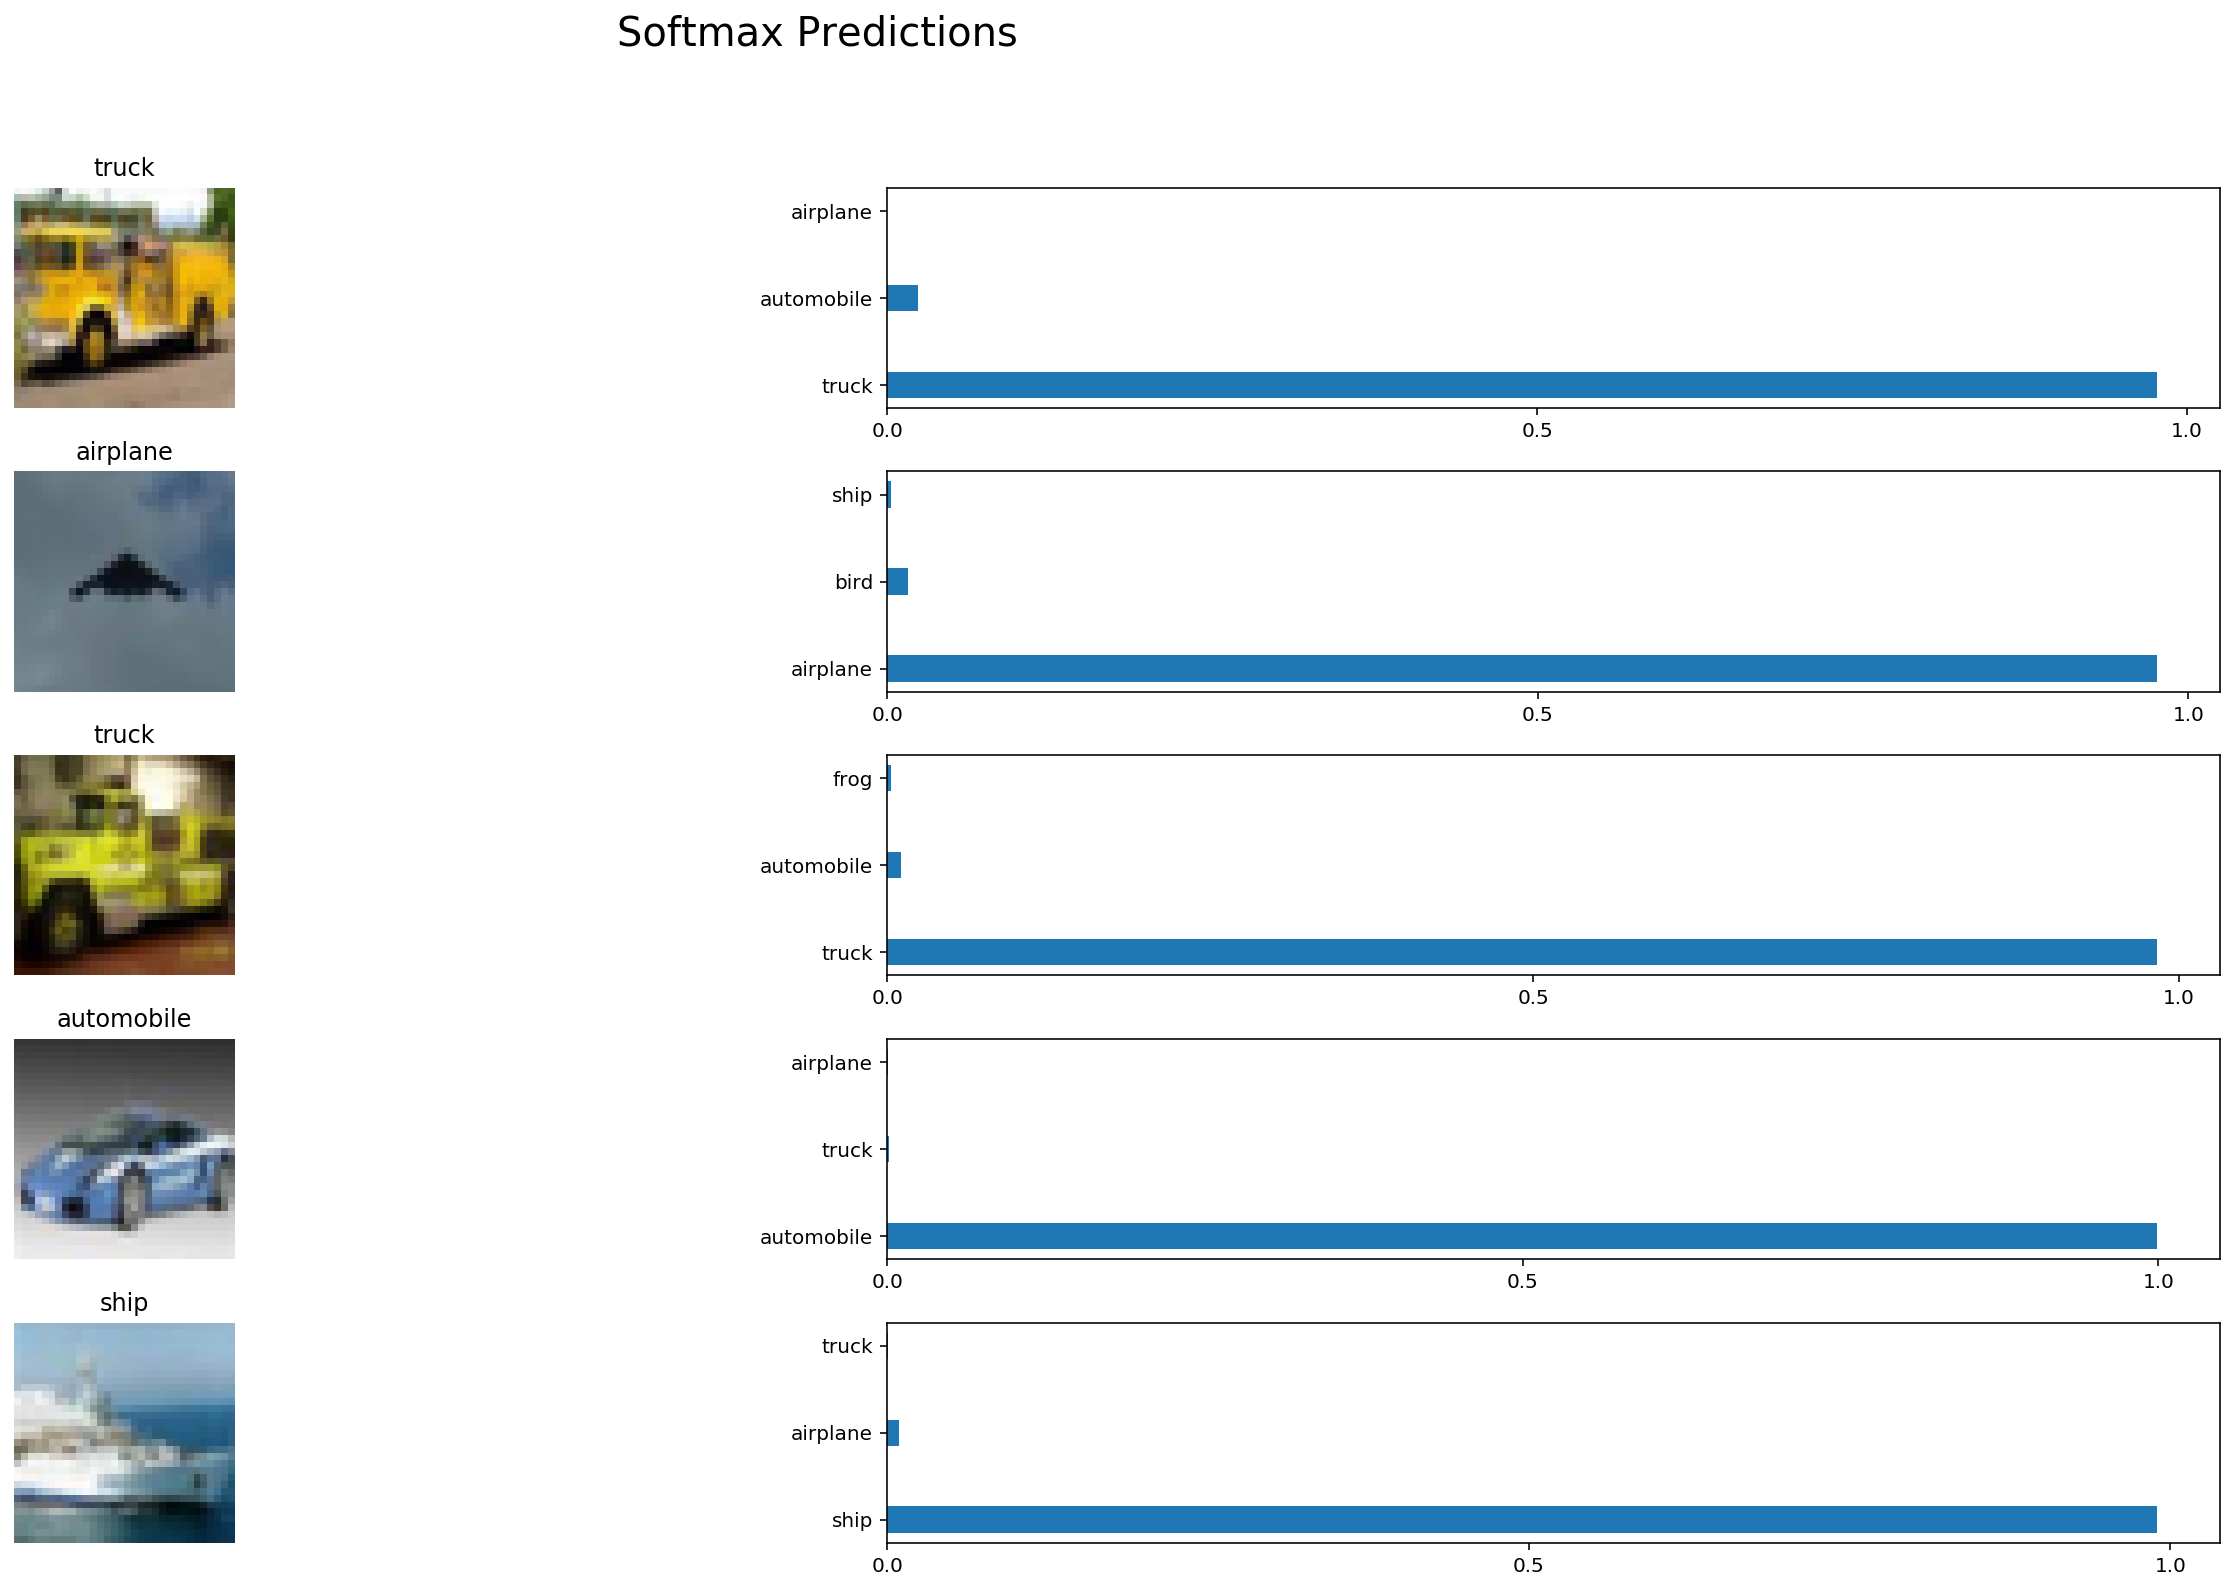

In [8]:
data_kmeansb = np.array(data_kmeans)
labels_kmeansb = np.array(labels_kmeans)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import random
config = tf.ConfigProto()
config.gpu_options.allow_growth = True

n_samples = 5
top_n_predictions = 3


loaded_graph = tf.Graph()
save_model_path = r"C:\Users\rahul\Google Drive\Rahul\Courses\ECE219\Project_2\Model\model.ckpt"
with tf.Session(graph=loaded_graph,config=config) as sess:
    # Load model
    loader = tf.train.import_meta_graph(save_model_path + '.meta')
    loader.restore(sess, save_model_path)

    # Get Tensors from loaded model
    loaded_x = loaded_graph.get_tensor_by_name('input_x:0')
    loaded_y = loaded_graph.get_tensor_by_name('output_y:0')
    loaded_ypr = loaded_graph.get_tensor_by_name('ypr:0')
    loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
    loaded_features = loaded_graph.get_tensor_by_name('features:0')
    testacc1 = 100*(sess.run(loaded_acc,feed_dict={loaded_x: data_kmeansb[:10000], loaded_y: labels_kmeansb[:10000]}))
    features_kmeans1 = (sess.run(loaded_features,feed_dict={loaded_x: data_kmeans[:10000], loaded_y: labels_kmeans[:10000]}))
    testacc2 = 100*(sess.run(loaded_acc,feed_dict={loaded_x: data_kmeansb[10000:20000], loaded_y: labels_kmeansb[10000:20000]}))
    features_kmeans2 = (sess.run(loaded_features,feed_dict={loaded_x: data_kmeans[10000:20000], loaded_y: labels_kmeans[10000:20000]}))
    testacc3 = 100*(sess.run(loaded_acc,feed_dict={loaded_x: data_kmeansb[20000:30000], loaded_y: labels_kmeansb[20000:30000]}))
    features_kmeans3 = (sess.run(loaded_features,feed_dict={loaded_x: data_kmeans[20000:30000], loaded_y: labels_kmeans[20000:30000]}))
    labels_features = labels_kmeans
    features_kmeans = np.concatenate((features_kmeans1,features_kmeans2,features_kmeans3),axis=0)
    print("Test Accuracy : {} %".format((testacc1+testacc2+testacc3)/3))

    # Print Random Samples
    random_test_features, random_test_labels = tuple(zip(*random.sample(list(zip(data_kmeansb.astype(dtype=np.uint8)
                                                                                 , labels_kmeansb)), n_samples)))
    random_test_features2 = np.asarray(random_test_features).astype(dtype = "float")
    random_test_labels2 = np.asarray(random_test_labels)
    random_test_predictions = sess.run(tf.nn.top_k(loaded_ypr,top_n_predictions)
                                       ,feed_dict={loaded_x: random_test_features2, loaded_y: random_test_labels2})
    display_image_predictions(random_test_features, random_test_labels, random_test_predictions, n_samples,top_n_predictions)


(30000, 4096)


(30000,)
